<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 분석

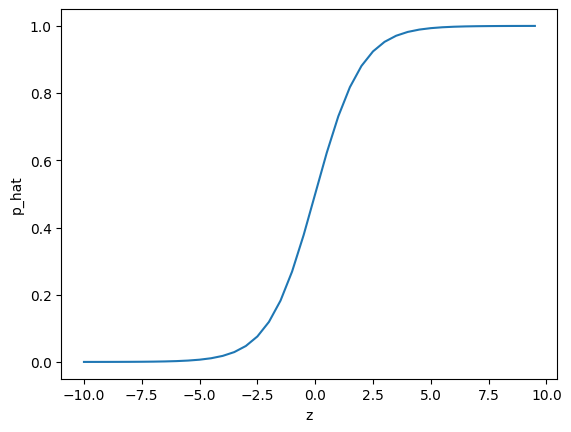

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.5의 간격으로 표시
p_hat = 1 / (1 + np.exp(-z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

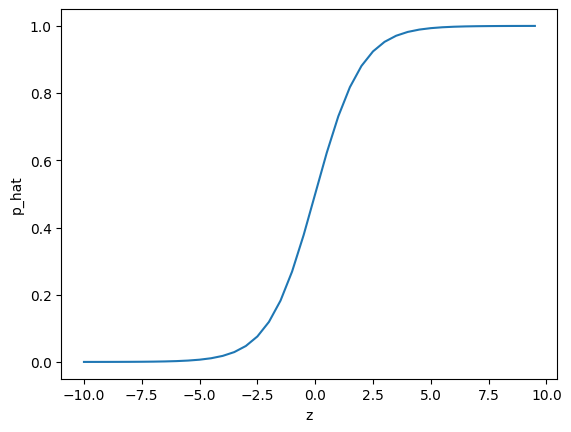

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.5의 간격으로 표시
p_hat = np.exp(z) / (1 + np.exp(z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

## 퀴즈

In [ ]:
TP = 64; FN = 18; FP = 104; TN = 128
# 정확도 = 정분류율
acc = (TP + TN) / (TP + FN + FP + TN)
print("정확도 = 정분류율", acc)
# 오분류율
print("오분류율", 1 - acc)
# 정밀도
# 예측한 것들 중에서 얼마나 잘 맞췄는가 = 모델 정확도
prec = TP / (TP + FP)
print("정밀도", prec)
# 재현율 = 민감도 = 소수집단 정분류율
# 실제 참인 것들 중에서 얼마나 잘 예측(재현)하였는가
reca = TP / (TP + FN)
print("재현율", reca)
# 소수집단 오분류율
print("소수집단 오분류율", 1 - reca)
# 특이도
spec = TN / (FP + TN)
print("특이도", spec)
# f1 점수
f1s = 2 * prec * reca / (prec + reca)
print("f1 점수", f1s)

정확도 = 정분류율 0.6114649681528662
오분류율 0.3885350318471338
정밀도 0.38095238095238093
재현율 0.7804878048780488
소수집단 오분류율 0.2195121951219512
특이도 0.5517241379310345
f1 점수 0.512


## 로지스틱 회귀 분석

### 전체데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/mortgage.xlsx', engine = 'openpyxl')
df.head()
# 담보대출승인여부, 착수금비율, 소득대출비율

,y,x1,x2
0,1,16.35,49.94
1,1,34.43,56.16
2,1,39.19,36.89
3,1,23.58,56.88
4,0,29.92,27.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df['y'].unique()

array([1, 0])

In [ ]:
df['y'].value_counts()

,count
y,
1,17
0,13


In [ ]:
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression();m1.fit(X, y)

LogisticRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_[0], 5);intercept1

-9.31469

In [ ]:
# 기울기
slope1 = [round(x, 5) for x in m1.coef_[0]];print(slope1)

[0.13407, 0.17728]


In [ ]:
for name, coef in zip(X.columns, slope1):
  print("{}: {}".format(name, coef))

x1: 0.13407
x2: 0.17728


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)

y_hat = -9.31469 + 0.13407 * x1 + 0.17728 * x2


In [ ]:
# 예측
y_pred1 = m1.predict(X)
y_pred1[:5]

array([1, 1, 1, 1, 0])

In [ ]:
y_pred1_proba = m1.predict_proba(X)
y_pred1_proba[:5]

array([[0.1505, 0.8495],
       [0.0052, 0.9948],
       [0.0773, 0.9227],
       [0.0193, 0.9807],
       [0.6243, 0.3757]])

In [ ]:
m1.classes_

array([0, 1])

In [ ]:
zv = m1.decision_function(X)

In [ ]:
zv[:5]

array([ 1.7306,  5.2573,  2.4794,  3.9303, -0.5079])

In [ ]:
X.head()

,x1,x2
0,16.35,49.94
1,34.43,56.16
2,39.19,36.89
3,23.58,56.88
4,29.92,27.05


In [ ]:
x1 = X['x1'][0];x2 = X['x2'][0]
-9.31469 + 0.13407 * x1 + 0.17728 * x2

1.7307176999999978

In [ ]:
print(y_pred1_proba[:5])
from scipy.special import expit
expit(zv)

[[0.1505 0.8495]
 [0.0052 0.9948]
 [0.0773 0.9227]
 [0.0193 0.9807]
 [0.6243 0.3757]]


array([0.8495, 0.9948, 0.9227, 0.9807, 0.3757, 0.8743, 0.9861, 0.8911,
       0.6339, 0.7016, 0.5346, 0.0837, 0.0631, 0.2251, 0.9123, 0.4579,
       0.9671, 0.8868, 0.9868, 0.227 , 0.029 , 0.066 , 0.9842, 0.1305,
       0.6644, 0.1657, 0.1506, 0.2535, 0.898 , 0.1034])

In [ ]:
# 성능 평가 - 정확도
print(m1.score(X, y))
print(np.mean(y == y_pred1))

0.8666666666666667
0.8666666666666667


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
logit_cm = confusion_matrix(y, y_pred1)
print(logit_cm)

[[11  2]
 [ 2 15]]


In [ ]:
from sklearn.metrics import classification_report
logit_rpt = classification_report(y, y_pred1)
print(logit_rpt)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        17

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
# support = 샘플의 개수

In [ ]:
# macro avg = 산술평균
(0.85 + 0.88) / 2

0.865

In [ ]:
# weighted avg = 가중평균
(0.85 * 13 + 0.88 * 17) / 30

0.8669999999999999

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y, y_pred1);print(acc)
pre = precision_score(y, y_pred1);print(pre)
rec = recall_score(y, y_pred1);print(rec)
f1 = f1_score(y, y_pred1);print(f1)

0.8666666666666667
0.8823529411764706
0.8823529411764706
0.8823529411764706


In [ ]:
# 문제풀이
x1 = 20; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.21167
0.21167
0.21167


In [ ]:
x1 = 30; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.50645
0.50645
0.50645


## 선형확률모형

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m2 = LinearRegression();m2.fit(X, y)

LinearRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept2 = round(m2.intercept_, 5);print(intercept2)

-0.86815


In [ ]:
# 기울기
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[0.0188, 0.0258]


In [ ]:
for name, coef in zip(X.columns, slope2):
  print("{}: {}".format(name, coef))

x1: 0.0188
x2: 0.0258


In [ ]:
# 표본회귀식
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2


In [ ]:
# 예측값
y_pred2 = m2.predict(X)
y_pred2

array([ 0.7299,  1.2312,  0.8231,  1.0453,  0.3943,  0.7541,  1.0849,
        0.7872,  0.5467,  0.5937,  0.4966,  0.1333,  0.0888,  0.294 ,
        0.8069,  0.4381,  0.9597,  0.771 ,  1.0913,  0.292 , -0.0327,
        0.0875,  1.0684,  0.2046,  0.5814,  0.2456,  0.2282,  0.3126,
        0.7805,  0.162 ])

In [ ]:
# 분류값
y_bin = [np.round(x) for x in y_pred2]
y_bin[:5]

[1.0, 1.0, 1.0, 1.0, 0.0]

In [ ]:
# 성능 평가
np.mean(y == y_bin)

0.8333333333333334

In [ ]:
# 문제풀이
x1 = 20; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.28185


In [ ]:
x1 = 30; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.46985


In [ ]:
x1 = [0,5,20,30,50,60]
x2 = 30
n = len(x1)
x1_list = []
x2_list = []
lp_list = []
logit_p_list = []
for i in range(n):
  lp = -0.86815 + 0.0188 * x1[i] + 0.0258 * x2
  logit_y = -9.314688987681512 + 0.13407 * x1[i] + 0.17728 * x2
  logit_p = 1 / (1 + np.exp(-logit_y))
  x1_list.append(x1[i])
  x2_list.append(x2)
  lp_list.append(lp)
  logit_p_list.append(logit_p)
prob_df = pd.DataFrame({'x1': x1_list,
                        'x2': x2_list,
                        'lp': lp_list,
                        'logit_p': logit_p_list})
prob_df

,x1,x2,lp,logit_p
0,0,30,-0.09415,0.018052
1,5,30,-0.00015,0.034692
2,20,30,0.28185,0.211670
3,30,30,0.46985,0.506452
4,50,30,0.84585,0.937451
5,60,30,1.03385,0.982841


## 로지스틱 회귀 모델

### 데이터 분할

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/spam.xlsx', engine = 'openpyxl')
df.head()

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58
2,3,1,13,11,88
3,4,1,17,11,68
4,5,0,15,1,87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Record      500 non-null    int64
 1   Spam        500 non-null    int64
 2   Recipients  500 non-null    int64
 3   Hyperlinks  500 non-null    int64
 4   Characters  500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
df['Spam'].unique()

array([0, 1])

In [ ]:
df['Spam'].value_counts()

,count
Spam,
1,258
0,242


In [ ]:
df.columns

Index(['Record', 'Spam', 'Recipients', 'Hyperlinks', 'Characters'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['Recipients', 'Hyperlinks', 'Characters']]
y = df['Spam']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 성능 평가 - 정확도
print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.7971428571428572
0.8


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = round(logit.intercept_[0], 5);intercept

-3.46566

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[0.08576, 0.50353, -0.01526]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

Recipients: 0.08576
Hyperlinks: 0.50353
Characters: -0.01526


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = -3.46566 + 0.08576 * Recipients + 0.50353 * Hyperlinks + -0.01526 * Characters


In [ ]:
# 예측
y_train_pred = logit.predict(X_train)
y_test_pred = logit.predict(X_test)

In [ ]:
y_train_pred[:5]

array([0, 0, 1, 1, 0])

In [ ]:
y_train[:5]

,Spam
5,0
116,0
45,1
16,1
462,0


In [ ]:
y_test_pred[:5]

array([1, 0, 1, 1, 1])

In [ ]:
y_test[:5]

,Spam
361,0
73,0
374,1
155,1
104,1


In [ ]:
y_train_proba = logit.predict_proba(X_train)
y_test_proba = logit.predict_proba(X_test)

In [ ]:
y_train_proba[:5]

array([[0.8518, 0.1482],
       [0.5857, 0.4143],
       [0.1992, 0.8008],
       [0.1072, 0.8928],
       [0.7744, 0.2256]])

In [ ]:
y_test_proba[:5]

array([[0.1329, 0.8671],
       [0.9173, 0.0827],
       [0.0805, 0.9195],
       [0.2191, 0.7809],
       [0.0832, 0.9168]])

In [ ]:
logit.classes_

array([0, 1])

In [ ]:
zv1 = logit.decision_function(X_train)
zv2 = logit.decision_function(X_test)

In [ ]:
from scipy.special import expit
print(expit(zv1)[:5])
print(expit(zv2)[:5])
# 1 에 대한 확률값

[0.1482 0.4143 0.8008 0.8928 0.2256]
[0.8671 0.0827 0.9195 0.7809 0.9168]


In [ ]:
# 성능 평가
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.7971428571428572
0.8


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
print(train_cm)

[[138  34]
 [ 37 141]]


In [ ]:
from sklearn.metrics import confusion_matrix
test_cm = confusion_matrix(y_test, y_test_pred)
print(test_cm)

[[58 12]
 [18 62]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
print(train_rpt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       172
           1       0.81      0.79      0.80       178

    accuracy                           0.80       350
   macro avg       0.80      0.80      0.80       350
weighted avg       0.80      0.80      0.80       350



In [ ]:
from sklearn.metrics import classification_report
test_rpt = classification_report(y_test, y_test_pred)
print(test_rpt)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        70
           1       0.84      0.78      0.81        80

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



In [ ]:
# 문제 풀이
Recipients = 20; Hyperlinks = 5; Characters = 60
zv = -3.46564 + 0.08576 * Recipients + 0.50352 * Hyperlinks + -0.01526 * Characters
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.46296
0.46296
0.46296


In [ ]:
y_test[:5]

,Spam
361,0
73,0
374,1
155,1
104,1


In [ ]:
y_test_proba[:,0][:5]

array([0.1329, 0.9173, 0.0805, 0.2191, 0.0832])

In [ ]:
y_test_proba[:,1][:5]

array([0.8671, 0.0827, 0.9195, 0.7809, 0.9168])

In [ ]:
y_test_pred[:5]

array([1, 0, 1, 1, 1])

In [ ]:
logit_df = pd.DataFrame({'y': y_test,
                         'class_0_prob': y_test_proba[:,0],
                         'class_1_prob': y_test_proba[:,1],
                         'y_bin': y_test_pred})
logit_df

,y,class_0_prob,class_1_prob,y_bin
361,0,0.132885,0.867115,1
73,0,0.917299,0.082701,0
374,1,0.080473,0.919527,1
155,1,0.219080,0.780920,1
104,1,0.083151,0.916849,1
...,...,...,...,...
266,1,0.222673,0.777327,1
23,1,0.511322,0.488678,0
222,1,0.133978,0.866022,1
261,1,0.065748,0.934252,1


## 로지스틱 회귀 모델 - 이진분류

### 분석

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/breast-cancer-wisconsin.data',
                 header = None)
df.head()
# 10 cancer - benign 2, malignant 4

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df[df['bare_nuclei'] == '?']

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

,count
bare_nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
NaN,16
9,9


In [ ]:
df = df.dropna(subset = ['bare_nuclei'], axis = 0)
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['bare_nuclei']

,bare_nuclei
0,1
1,10
2,2
3,4
4,1
...,...
694,2
695,1
696,3
697,4


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
df.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train_scale, y_train)

LogisticRegression()

In [ ]:
# 정확도
print(logit.score(X_train_scale, y_train))
print(logit.score(X_test_scale, y_test))

0.9748953974895398
0.9560975609756097


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = logit.intercept_[0];intercept

-1.467722329944025

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[1.18566, 0.18457, 0.70869, 0.60123, 0.02198, 1.51328, 1.03369, 0.52214, 0.7457]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

clump: 1.18566
cell_size: 0.18457
cell_shape: 0.70869
adhesion: 0.60123
epithlial: 0.02198
bare_nuclei: 1.51328
chromatin: 1.03369
normal_nucleoli: 0.52214
mitoses: 0.7457


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = -1.467722329944025 + 1.18566 * clump + 0.18457 * cell_size + 0.70869 * cell_shape + 0.60123 * adhesion + 0.02198 * epithlial + 1.51328 * bare_nuclei + 1.03369 * chromatin + 0.52214 * normal_nucleoli + 0.7457 * mitoses


In [ ]:
# 예측
y_train_pred = logit.predict(X_train_scale)
y_test_pred = logit.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
y_train_proba = logit.predict_proba(X_train_scale)
y_test_proba = logit.predict_proba(X_test_scale)

In [ ]:
y_train_proba[:5]

array([[0.0017, 0.9983],
       [0.9889, 0.0111],
       [0.9668, 0.0332],
       [0.0037, 0.9963],
       [0.9987, 0.0013]])

In [ ]:
y_test_proba[:5]

array([[0.0187, 0.9813],
       [0.0001, 0.9999],
       [0.9968, 0.0032],
       [0.9949, 0.0051],
       [0.9979, 0.0021]])

In [ ]:
logit.classes_

array([2, 4])

In [ ]:
zv1 = logit.decision_function(X_train_scale)
zv2 = logit.decision_function(X_test_scale)

In [ ]:
from scipy.special import expit
print(expit(zv1)[:5])
print(expit(zv2)[:5])

[0.9983 0.0111 0.0332 0.9963 0.0013]
[0.9813 0.9999 0.0032 0.0051 0.0021]


In [ ]:
# 성능 평가
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9748953974895398
0.9560975609756097


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)
print(test_cm)

[[311   6]
 [  6 155]]
[[125   2]
 [  7  71]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
test_rpt = classification_report(y_test, y_test_pred)
print(train_rpt)
print(test_rpt)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       317
           4       0.96      0.96      0.96       161

    accuracy                           0.97       478
   macro avg       0.97      0.97      0.97       478
weighted avg       0.97      0.97      0.97       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



## 로지스틱 회귀 모델 - 다중분류

### 분석

In [ ]:
from sklearn import datasets

In [ ]:
wine_data = datasets.load_wine()

In [ ]:
wine_data

{'data': array([[  14.23,    1.71,    2.43, ...,    1.04,    3.92, 1065.  ],
        [  13.2 ,    1.78,    2.14, ...,    1.05,    3.4 , 1050.  ],
        [  13.16,    2.36,    2.67, ...,    1.03,    3.17, 1185.  ],
        ...,
        [  13.27,    4.28,    2.26, ...,    0.59,    1.56,  835.  ],
        [  13.17,    2.59,    2.37, ...,    0.6 ,    1.62,  840.  ],
        [  14.13,    4.1 ,    2.74, ...,    0.61,    1.6 ,  560.  ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
# 특성
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [ ]:
df['class'] = wine_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

,count
class,
1,71
0,59
2,48


In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (124, 13)
test 데이터:  (54, 13)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train_scale, y_train)

LogisticRegression()

In [ ]:
# 정확도
print(logit.score(X_train_scale, y_train))
print(logit.score(X_test_scale, y_test))

1.0
0.9814814814814815


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = logit.intercept_[0];intercept

0.3613651050695107

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[0.78209, 0.1132, 0.47667, -0.82917, 0.0443, 0.36653, 0.52797, -0.05328, 0.1867, 0.16696, 0.07097, 0.59521, 0.90277]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

alcohol: 0.78209
malic_acid: 0.1132
ash: 0.47667
alcalinity_of_ash: -0.82917
magnesium: 0.0443
total_phenols: 0.36653
flavanoids: 0.52797
nonflavanoid_phenols: -0.05328
proanthocyanins: 0.1867
color_intensity: 0.16696
hue: 0.07097
od280/od315_of_diluted_wines: 0.59521
proline: 0.90277


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 0.3613651050695107 + 0.78209 * alcohol + 0.1132 * malic_acid + 0.47667 * ash + -0.82917 * alcalinity_of_ash + 0.0443 * magnesium + 0.36653 * total_phenols + 0.52797 * flavanoids + -0.05328 * nonflavanoid_phenols + 0.1867 * proanthocyanins + 0.16696 * color_intensity + 0.07097 * hue + 0.59521 * od280/od315_of_diluted_wines + 0.90277 * proline


In [ ]:
# 예측
y_train_pred = logit.predict(X_train_scale)
y_test_pred = logit.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[2 1 1 0 1]
[2 1 1 0 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 2 0 1]
[0 0 2 0 1]


In [ ]:
y_train_proba = logit.predict_proba(X_train_scale)
y_test_proba = logit.predict_proba(X_test_scale)

In [ ]:
y_train_proba[:5]

array([[0.0093, 0.032 , 0.9587],
       [0.007 , 0.9926, 0.0004],
       [0.025 , 0.9742, 0.0008],
       [0.9888, 0.0056, 0.0056],
       [0.0032, 0.9967, 0.0001]])

In [ ]:
y_test_proba[:5]

array([[0.9969, 0.0018, 0.0014],
       [0.9933, 0.0006, 0.0061],
       [0.013 , 0.028 , 0.959 ],
       [0.9926, 0.0066, 0.0008],
       [0.0031, 0.9964, 0.0006]])

In [ ]:
logit.classes_

array([0, 1, 2])

In [ ]:
zv1 = logit.decision_function(X_train_scale)
zv2 = logit.decision_function(X_test_scale)

In [ ]:
# 이진분류 = 로지스틱 함수
# 다중분류 = 소프트맥스 함수
from scipy.special import softmax
print(softmax(zv1, axis = 1)[:5])
print(softmax(zv2, axis = 1)[:5])

[[0.0093 0.032  0.9587]
 [0.007  0.9926 0.0004]
 [0.025  0.9742 0.0008]
 [0.9888 0.0056 0.0056]
 [0.0032 0.9967 0.0001]]
[[0.9969 0.0018 0.0014]
 [0.9933 0.0006 0.0061]
 [0.013  0.028  0.959 ]
 [0.9926 0.0066 0.0008]
 [0.0031 0.9964 0.0006]]


In [ ]:
# axis=1 로 지정해야 각 행, 즉 샘플에 대한 소프트맥스 계산, 지정하지 않으면 배열 전체에 대한 소프트맥스 계산

In [ ]:
# 성능 평가
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9814814814814815


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)
print(test_cm)

[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
test_rpt = classification_report(y_test, y_test_pred)
print(train_rpt)
print(test_rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        34

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## 로지스틱 손실 함수

In [ ]:
# 음수를 취하면 최종값이 양수가 되어 해석이 쉬움
# 타깃이 1
# 확률이 1에서 멀어질수록 큰 양수
print(-np.log(0.8))
print(-np.log(0.4))

0.2231435513142097
0.916290731874155


In [ ]:
# 타깃이 0
# 0에서 멀어질수록 큰 양수, 큰 양수 = 손실이 크다
# 0.3 * 0 => 0.7 * 1
print(-np.log(0.7))
# 0.9 * 0 => 0.1 * 1
print(-np.log(0.1))

0.35667494393873245
2.3025850929940455


## 경사하강법

## SGD - 이진분류

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/breast-cancer-wisconsin.data',
                 header = None)

In [ ]:
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df[df['bare_nuclei'] == '?']
df['bare_nuclei'].replace('?', np.nan, inplace = True)
df['bare_nuclei'].unique()

<ipython-input-166-299ac2f90cfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bare_nuclei'].replace('?', np.nan, inplace = True)


array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

,count
bare_nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
NaN,16
9,9


In [ ]:
df.dropna(subset = ['bare_nuclei'], axis = 0, inplace = True)
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
df.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

### 경사하강법

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9309623430962343
0.8878048780487805


### 점진적 학습

In [ ]:
# 점진적 학습
sgd.partial_fit(X_train_scale, y_train)
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))
# 언제까지 반복해야할지에 대한 기준이 없음

0.9707112970711297
0.9512195121951219


### 반복

In [ ]:
# 반복
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", random_state = 42)

In [ ]:
classes = np.unique(y_train);classes

array([2, 4])

In [ ]:
train_score = []
test_score = []
for i in range(200):
  # 점진적 학습
  sgd.partial_fit(X_train_scale, y_train, classes=classes)
  # 정확도
  train_score.append(sgd.score(X_train_scale, y_train))
  test_score.append(sgd.score(X_test_scale, y_test))

In [ ]:
print(train_score)
print(test_score)

[0.9707112970711297, 0.9686192468619247, 0.9665271966527197, 0.9728033472803347, 0.9623430962343096, 0.9665271966527197, 0.9728033472803347, 0.9728033472803347, 0.9665271966527197, 0.9769874476987448, 0.9686192468619247, 0.9686192468619247, 0.9707112970711297, 0.9728033472803347, 0.9665271966527197, 0.9707112970711297, 0.9686192468619247, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9769874476987448, 0.9790794979079498, 0.9769874476987448, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9748953974895398,

### 손실곡선

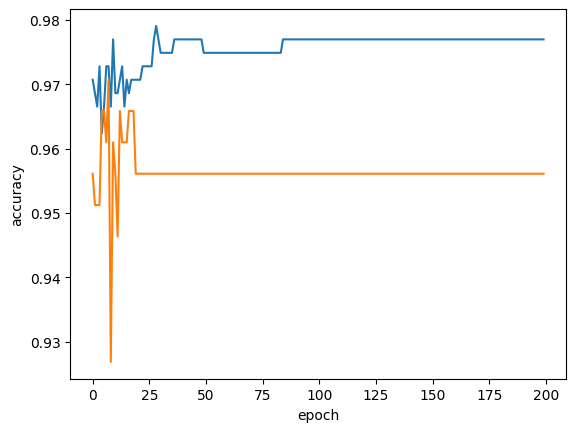

In [ ]:
# 손실곡선
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
epoch_index = slice(0,30)
print(train_score[epoch_index])
print(test_score[epoch_index])

[0.9707112970711297, 0.9686192468619247, 0.9665271966527197, 0.9728033472803347, 0.9623430962343096, 0.9665271966527197, 0.9728033472803347, 0.9728033472803347, 0.9665271966527197, 0.9769874476987448, 0.9686192468619247, 0.9686192468619247, 0.9707112970711297, 0.9728033472803347, 0.9665271966527197, 0.9707112970711297, 0.9686192468619247, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9769874476987448, 0.9790794979079498, 0.9769874476987448]
[0.9560975609756097, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9658536585365853, 0.9658536585365853, 0.9609756097560975, 0.9707317073170731, 0.926829268292683, 0.9609756097560975, 0.9560975609756097, 0.9463414634146341, 0.9658536585365853, 0.9609756097560975, 0.9609756097560975, 0.9609756097560975, 0.9658536585365853, 0.9658536585365853, 0.9658536585365853, 0.9560975609756097,

In [ ]:
pd.Series(train_score[epoch_index]) - pd.Series(test_score[epoch_index])

,0
0,0.014614
1,0.017400
2,0.015308
3,0.021584
4,-0.003511
5,0.000674
6,0.011828
7,0.002072
8,0.039698
9,0.016012


In [ ]:
# epoch = 30
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 30, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=30, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9707112970711297
0.9707317073170731


In [ ]:
# 손실함수 값
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 200, tol = 0.001, random_state = 42)
sgd.fit(X_train_scale, y_train)

SGDClassifier(loss='log_loss', max_iter=200, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9769874476987448
0.9609756097560975


In [ ]:
sgd.n_iter_

33

## SGD - 다중분류

### 준비

In [ ]:
wine_data = datasets.load_wine()

In [ ]:
# 특성
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [ ]:
df['class'] = wine_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

,count
class,
1,71
0,59
2,48


In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (124, 13)
test 데이터:  (54, 13)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

### 경사하강법

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


### 점진적 학습

In [ ]:
# 점진적 학습
sgd.partial_fit(X_train_scale, y_train)
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))
# 언제까지 반복해야할지에 대한 기준이 없음

1.0
0.9814814814814815


### 반복

In [ ]:
# 반복
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", random_state = 42)

In [ ]:
classes = np.unique(y_train);classes

array([0, 1, 2])

In [ ]:
train_score = []
test_score = []
for i in range(200):
  # 점진적 학습
  sgd.partial_fit(X_train_scale, y_train, classes=classes)
  # 정확도
  train_score.append(sgd.score(X_train_scale, y_train))
  test_score.append(sgd.score(X_test_scale, y_test))

In [ ]:
print(train_score)
print(test_score)

[0.967741935483871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

### 손실곡선

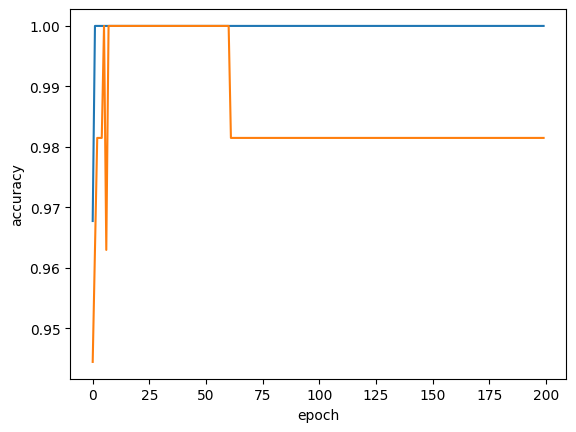

In [ ]:
# 손실곡선
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
epoch_index = slice(10,20)
print(train_score[epoch_index])
print(test_score[epoch_index])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
pd.Series(train_score[epoch_index]) - pd.Series(test_score[epoch_index])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
# epoch = 10
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


In [ ]:
# 손실함수 값
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 200, tol = 0.001, random_state = 42)
sgd.fit(X_train_scale, y_train)

SGDClassifier(loss='log_loss', max_iter=200, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


In [ ]:
sgd.n_iter_

11